# Multiplexer

In [212]:
from qiskit import *
import numpy as np
from math import pi, sqrt
import random

In [213]:
backend = Aer.get_backend('statevector_simulator')
def getBloch(quantumCircuit):
    return visualization.plot_bloch_multivector(execute(quantumCircuit, backend).result().get_statevector())

In [214]:
def stateGenerator(state):
    state = state[::-1]
    current = int(state, 2)
    print('Current state: ', current)
    newState = [0 for i in range(0, 2**(len(state)))]
    newState[current] = 1
    print('Init state array: ',newState)
    return newState

In [215]:
def getMeasure(quantumCircuit, n):
    measures = []
    for i in range(0,n):
        outcome = execute(quantumCircuit, backend).result()
        hist = outcome.get_counts()
        for i in hist.keys():
            measures.append(i)
        return measures

In [216]:
# The last m qubit is 0
def makeCirc(n, m):
    initState = ''
    for i in range(0, n-m):
        initState += str(random.randint(0, 1))
    for i in range(0, m):
        initState += str(0)
    print(initState)
    qr = qr = QuantumRegister(n)
    cr = ClassicalRegister(n)
    qc = QuantumCircuit(qr, cr)
    initializeState = stateGenerator(initState)
    qc.initialize(initializeState, qr)
    return qc

In [242]:
qc = makeCirc(6,0)
# getBloch(qc);
# Input = S2.S1.I3.I1.I4.I2: If S1S2 =: 00 -> I1, 01 -> I2, 10 -> I3, 11 -> I4 
#  Output = xxxOxx

010101
Current state:  42
Init state array:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [243]:
qc.cswap(1,2,3)
qc.cswap(1,4,5)
qc.cswap(0,3,5)

for i in range(2,6):
    qc.measure(i, i)

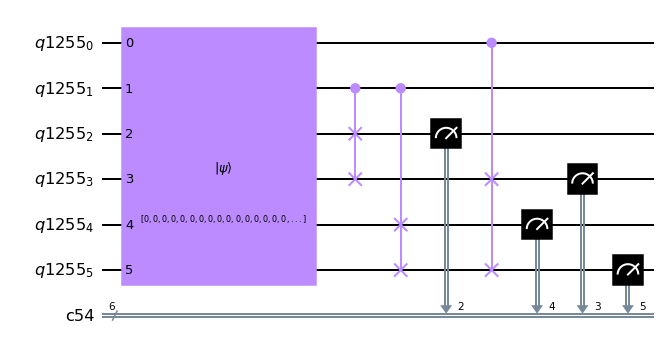

In [244]:
qc.draw();

In [245]:
getMeasure(qc, 1)[0][::-1]
# 1100: 1+1 = 0, carry 1 (1001)

'001010'

In [260]:
qcmux = QuantumCircuit(6)
qcmux.cswap(1,2,3)
qcmux.cswap(1,4,5)
qcmux.cswap(0,3,5)

In [261]:
mux = qcmux.to_gate(label =" Multiplexer")

In [262]:
circ2 = QuantumCircuit(12,12)
circ2.append(mux, [0,1,2,3,4,5])

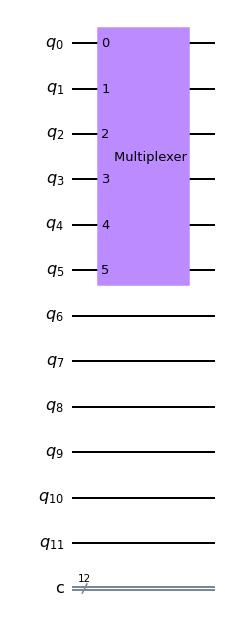

In [263]:
circ2.draw();

# Demultiplexer

In [264]:
qcdemux = QuantumCircuit(6)
qcdemux.cswap(1,2,3)
qcdemux.cswap(0,2,4)
qcdemux.cswap(0,3,5)

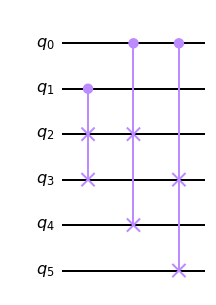

In [268]:
qcdemux.draw();

In [266]:
demux = qcdemux.to_gate(label=" Demux")

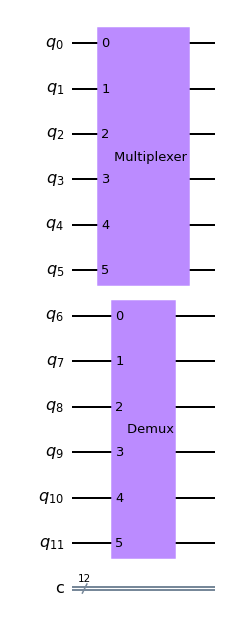

In [267]:
circ2.append(demux, [6,7,8,9,10,11])
circ2.draw();